# How to Improve the Testing Efficiency in Car Manufactories

<img src="https://images.unsplash.com/photo-1567789884554-0b844b597180?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1350&q=80" align = "right" style = "border:20px solid white">   

<h3> Situation:</h3>  

 * Each manufactured automobile needs to be tested to ensure the safety and reliability.  
 * Testing is a time-consuming process.
 * Different cars have different configurations/features.
 
<h3> Task:</h3> 
 
 * Optimizing the speed of testing system using a algorithmic approach 

<h3> Action:</h3>

 * Using regression models to identify key features that affect the testing time.  

<h3> Results:</h3> 

 * To reduce the testing time without compromising the reliability and safety of newly manufactured cars.


<h2>Project Workflow</h2>

1. Data exploration
2. Data cleaning
3. Model comparison
4. Important Features
5. Model optimization
6. Takeaway

## 1. Data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


#### Official description about this dataset:
"This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.   

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable."

In [4]:
print('row, column:')
print(data.shape)

row, column:
(4209, 378)


In [5]:
print('missing entry: %.f'%data.isnull().sum().max())

missing entry: 0


## 2. Data cleaning
### 2.1. Categorical features ---> numberical 

In [6]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [7]:
for f in data.columns:
    if data[f].dtype=='object': 
        le = preprocessing.LabelEncoder()
        le.fit(list(data[f].values))
        data[f] = le.transform(list(data[f].values))

In [8]:
data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(len(data)*0.8)

3367.2000000000003


In [10]:
# shuffle
data_r = data.sample(frac=1, random_state=13)
# 80% for training and 20% for testing.
train = data_r[:3367]
test = data_r[3368:]

In [11]:
train_c = train.set_index('ID')

### 2.2. Correlation

Wall time: 2.67 s


<AxesSubplot:>

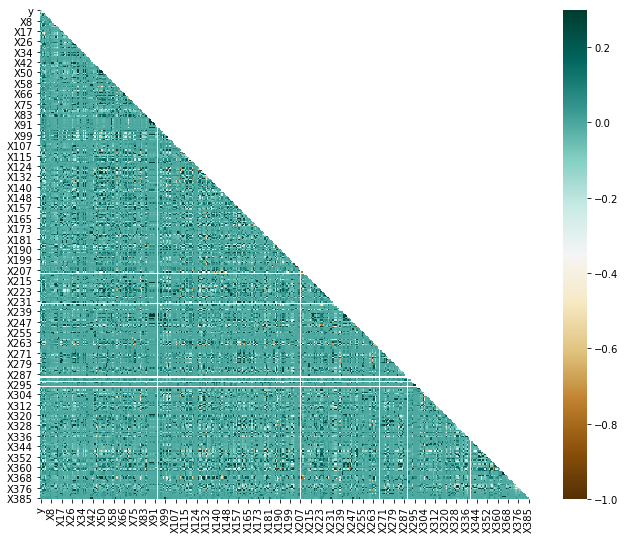

In [12]:
%%time
correlation_matrix = train_c.corr()
plt.figure(figsize=(12,9))
matrix = np.triu(train_c.corr())
sns.heatmap(correlation_matrix, mask = matrix, vmax=.3, square=True, cmap= 'BrBG')

### 2.3. Data normalization

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X_train = train.drop('y', 1)
y_train = train[['y']]
X_test = test.drop('y', 1)
y_test = test[['y']]

In [15]:
# standardize data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
sc1 = StandardScaler()
sc1.fit(y_train)
y_train_std = sc1.transform(y_train)
y_test_std = sc1.transform(y_test)

### 2.4. PCA analysis

In [16]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=0.9, svd_solver='full')
pca.fit_transform(X_train_std)

print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components =  115 ;
Total explained variance =  0.90013


In [24]:
pca = PCA(n_components=0.99, svd_solver='full')
pca.fit_transform(X_train_std)

print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components =  192 ;
Total explained variance =  0.9903


In [25]:
pca = PCA(n_components=0.999, svd_solver='full')
pca.fit_transform(X_train_std)

print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components =  226 ;
Total explained variance =  0.999


 PCA analysis shows that
 - The data dimensions can be reduced substantially while preserving data variance.
 - However, no transformation applies to the data in order to analyze the importance of each indivisual feature.

## 3. Model 

In [16]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
# Dummy
DR = DummyRegressor(strategy='mean')
DR.fit(X_train_std, y_train)
DR_pred = DR.predict(X_test_std)

Linear Regression cannot converge

In [18]:
# Lasso
LS = Lasso(random_state=13)
LS.fit(X_train_std, y_train)
LS_pred = LS.predict(X_test_std)

In [19]:
# Ridge
RG = Ridge(random_state=13)
RG.fit(X_train_std, y_train)
RG_pred = RG.predict(X_test_std)

In [20]:
# Support Vector Machine
SV = SVR(kernel='rbf')
SV.fit(X_train_std,y_train)
SV_pred=SV.predict(X_test_std)

In [21]:
#XGB
XG = XGBRegressor(random_state=13,objective ='reg:squarederror')
XG.fit(X_train_std, y_train)
XG_pred = XG.predict(X_test_std)

In [22]:
# Random Forest
RF = RandomForestRegressor(random_state=13)
RF.fit(X_train_std, y_train)
RF_pred = RF.predict(X_test_std)

In [23]:
score1 = metrics.r2_score(y_test, DR_pred)
score3 = metrics.r2_score(y_test, LS_pred)
score4 = metrics.r2_score(y_test, RG_pred)
score5 = metrics.r2_score(y_test, SV_pred)
score6 = metrics.r2_score(y_test,XG_pred)
score7 = metrics.r2_score(y_test, RF_pred)
print ('R2 score')
print (' dummy:        %.5f' % score1 )
print (' Lasso:        %.5f' % score3 )
print (' Ridge:        %.5f' % score4 )
print (' SVM:          %.5f' % score5 )
print (' XGB:          %.5f' % score6 )
print (' RandomForest: %.5f' % score7 )

R2 score
 dummy:        -0.00399
 Lasso:        0.55285
 Ridge:        0.59483
 SVM:          0.47698
 XGB:          0.56774
 RandomForest: 0.56270


#### Frontrunner: Ridge and Random Forest

## 4. Important Features

#### Which feature matters?
- Use feature importance to tell.

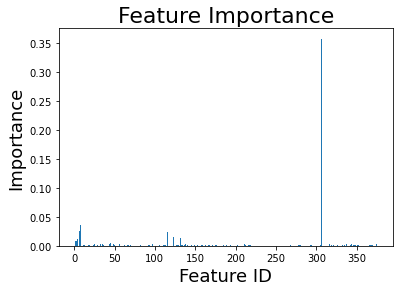

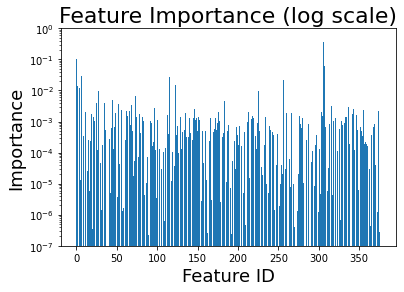

In [24]:
# get importance
importance = RF.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance', fontsize=22)
plt.xlabel('Feature ID', fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.show()

plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance (log scale)', fontsize=22)
plt.xlabel('Feature ID', fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.yscale('log')
plt.ylim(1e-7,1)
plt.show()

In [25]:
feature = [ ]
for i,v in enumerate(importance):
    if v >= 0.005:
        print('Feature: %0d, Score: %.5f' % (i,v))
        feature.append(i)

Feature: 0, Score: 0.10270
Feature: 1, Score: 0.01364
Feature: 2, Score: 0.00906
Feature: 3, Score: 0.00776
Feature: 4, Score: 0.01198
Feature: 6, Score: 0.02990
Feature: 7, Score: 0.02638
Feature: 8, Score: 0.03555
Feature: 27, Score: 0.00971
Feature: 73, Score: 0.00676
Feature: 115, Score: 0.02738
Feature: 116, Score: 0.02338
Feature: 123, Score: 0.01471
Feature: 132, Score: 0.01284
Feature: 225, Score: 0.00946
Feature: 256, Score: 0.02177
Feature: 272, Score: 0.00515
Feature: 306, Score: 0.35769
Feature: 307, Score: 0.06045


In [26]:
X_train = train.drop('y', axis=1)
X_train_r = X_train.iloc[:,feature]
X_test = test.drop('y', axis=1)
X_test_r = X_test.iloc[:,feature]

y_train = train['y'].values
y_test = test['y'].values

In [27]:
# Standarize data
sc2 = StandardScaler()
sc2.fit(X_train_r)
X_train_std2 = sc2.transform(X_train_r)
X_test_std2 = sc2.transform(X_test_r)

## 5. Model Optimization

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [29]:
X_train_std2.shape

(3367, 19)

In [30]:
# Random Forest
RF1 = RandomForestRegressor(random_state=13)
RF1.fit(X_train_std2, y_train)
RF_pred1 = RF1.predict(X_test_std2)

# Ridge
RG1 = Ridge(random_state=13)
RG1.fit(X_train_std2, y_train)
RG_pred1 = RG1.predict(X_test_std2)

#XGB
XG1 = XGBRegressor(random_state=13,objective ='reg:squarederror')
XG1.fit(X_train_std2, y_train)
XG_pred1 = XG1.predict(X_test_std2)

In [31]:
score7 = metrics.r2_score(y_test, RF_pred)
score4 = metrics.r2_score(y_test, RG_pred)
score6 = metrics.r2_score(y_test,XG_pred)

score8 = metrics.r2_score(y_test, RF_pred1)
score9 = metrics.r2_score(y_test, RG_pred1)
score10 = metrics.r2_score(y_test, XG_pred1)
print ('R2 score')
print ('--- before feature selection')
print (' RandomForest: %.5f' % score7 )
print (' Ridge:        %.5f' % score4 )
print (' XGB:          %.5f' % score6 )

print ('--- after feature selection')
print (' RandomForest: %.5f' %score8)
print (' Ridge:        %.5f' % score9)
print (' XGB:          %.5f' % score10)

R2 score
--- before feature selection
 RandomForest: 0.56270
 Ridge:        0.59483
 XGB:          0.56774
--- after feature selection
 RandomForest: 0.57152
 Ridge:        0.60468
 XGB:          0.56691


### 5.1. Hyperparmeter Tuning
- Grid search
- Cross-validation (KFold)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

### 5.1.1. Ridge

reference: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_coeffs.html#sphx-glr-auto-examples-linear-model-plot-ridge-coeffs-py

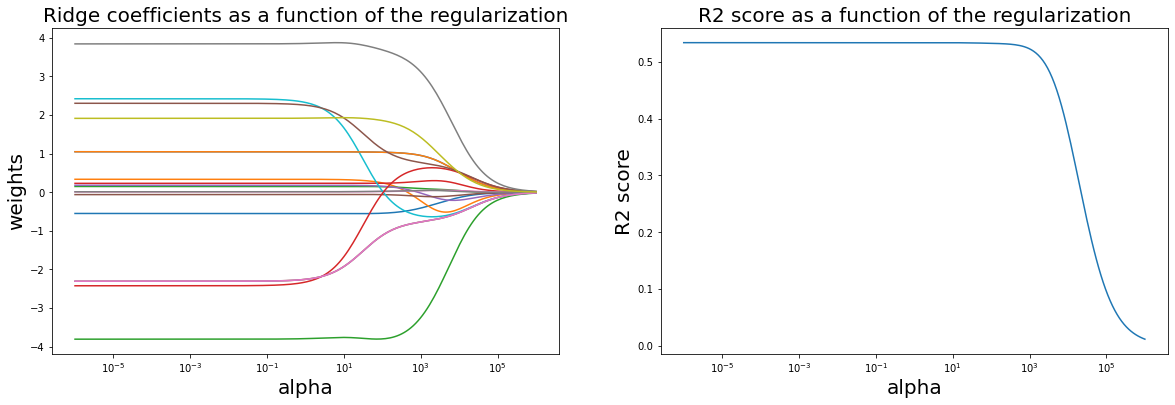

In [76]:
clf = Ridge()
alphas = np.logspace(-6, 6, 200)
coefs = []
r2 = []

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train_std2, y_train)
    y_pred=clf.predict(X_train_std2)
    coefs.append(clf.coef_)
    r2.append(metrics.r2_score(y_train, y_pred))
    
# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha', fontsize=20)
plt.ylabel('weights', fontsize=20)
plt.title('Ridge coefficients as a function of the regularization', fontsize=20)
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, r2)
ax.set_xscale('log')
plt.xlabel('alpha', fontsize=20)
plt.ylabel('R2 score', fontsize=20)
plt.title('R2 score as a function of the regularization', fontsize=20)
plt.axis('tight')

plt.show()

Regularization strength, alphas, not larger than 10 is favorable, such as the default alpha=1.0. 

### 5.1.2. Random Forest

In [33]:
# To optimize random forests
n_estimators = [100, 400, 500, 600, 1000]
max_depth = [int(x) for x in np.linspace(1, 5, num = 5)]

In [34]:
%%time
# define grid search
grid = dict(n_estimators=n_estimators, max_depth=max_depth)
cv = KFold(n_splits=10, random_state=13)
grid_search = GridSearchCV(estimator=RF, param_grid=grid, n_jobs=-1, cv=cv, scoring='r2',error_score=0)
grid_result = grid_search.fit(X_train_std2, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.560131 using {'max_depth': 3, 'n_estimators': 500}
0.361084 (0.058634) with: {'max_depth': 1, 'n_estimators': 100}
0.361036 (0.058660) with: {'max_depth': 1, 'n_estimators': 400}
0.361047 (0.058654) with: {'max_depth': 1, 'n_estimators': 500}
0.361056 (0.058647) with: {'max_depth': 1, 'n_estimators': 600}
0.361073 (0.058657) with: {'max_depth': 1, 'n_estimators': 1000}
0.520200 (0.077174) with: {'max_depth': 2, 'n_estimators': 100}
0.520101 (0.076041) with: {'max_depth': 2, 'n_estimators': 400}
0.520048 (0.076119) with: {'max_depth': 2, 'n_estimators': 500}
0.520665 (0.076368) with: {'max_depth': 2, 'n_estimators': 600}
0.520435 (0.076080) with: {'max_depth': 2, 'n_estimators': 1000}
0.559918 (0.078362) with: {'max_depth': 3, 'n_estimators': 100}
0.560105 (0.078083) with: {'max_depth': 3, 'n_estimators': 400}
0.560131 (0.078114) with: {'max_depth': 3, 'n_estimators': 500}
0.560108 (0.078044) with: {'max_depth': 3, 'n_estimators': 600}
0.560117 (0.078039) with: {'max_depth': 3, 

#### Visualizing hyperparameters tuning 

In [35]:
from matplotlib import cm

In [36]:
opt=pd.concat([pd.DataFrame(grid_result.cv_results_['params']),
               pd.DataFrame(grid_result.cv_results_['mean_test_score'], 
                            columns=["r2"])],axis=1)

In [37]:
X1 = opt['max_depth']
X2 = opt['n_estimators']
Y = opt['r2']

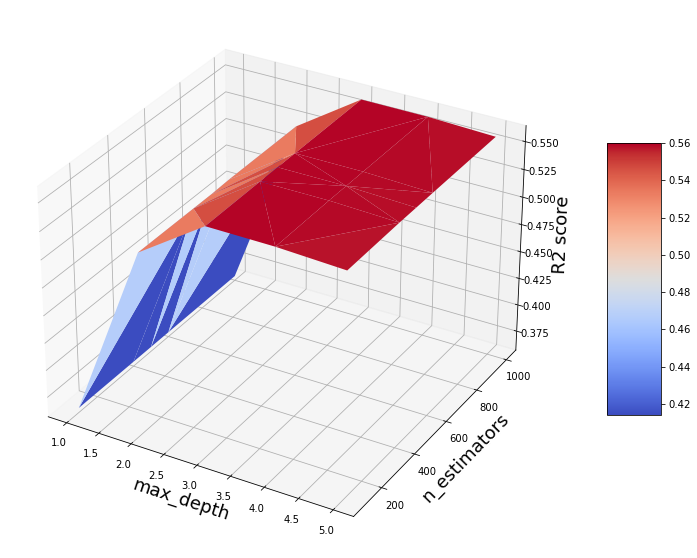

In [38]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
# Plot the surface
surf= ax.plot_trisurf(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, shade=True)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('max_depth', fontsize=18)
ax.set_ylabel('n_estimators', fontsize=18)
ax.set_zlabel('R2 score', fontsize=18)
plt.show()

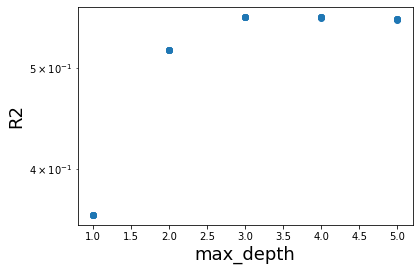

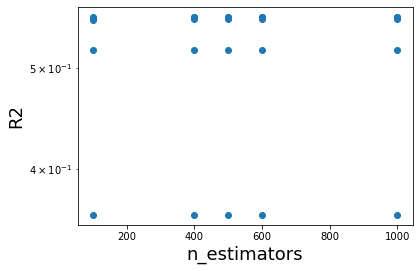

In [39]:
fig, ax = plt.subplots()
ax.scatter(X1, Y)
ax.set_xlabel('max_depth', fontsize=18)
ax.set_ylabel('R2', fontsize=18)
plt.yscale('log')
plt.show()


fig, ax = plt.subplots()
ax.scatter(X2, Y)
ax.set_xlabel('n_estimators', fontsize=18)
ax.set_ylabel('R2', fontsize=18)
plt.yscale('log')
plt.show()

In [40]:
# Optimized random forest
RF2 = RandomForestRegressor(random_state=13,max_depth=3,n_estimators=500)
RF2.fit(X_train_std2, y_train)
RF2_pred = RF2.predict(X_test_std2)

In [41]:
score_op = metrics.r2_score(y_test,RF2_pred)
print ('R2 score of Random Forest')
print (' Original: %.5f' % score7)
print (' Features: %.5f' % score8)
print (' Optimized:%.5f' % score_op)

R2 score of Random Forest
 Original: 0.56270
 Features: 0.57152
 Optimized:0.61643


### 5.2. Learning curve

Reference:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

In [47]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

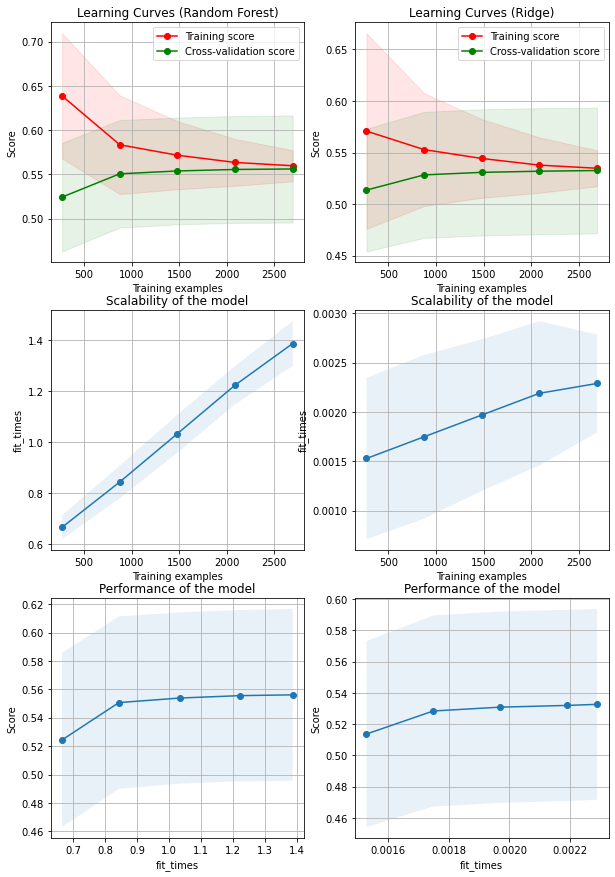

In [71]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))
title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=13)
estimator = RandomForestRegressor(random_state=13,max_depth=3,n_estimators=500)
plot_learning_curve(estimator, title, X_train_std2, y_train, axes=axes[:, 0],
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Ridge)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=13)
estimator = Ridge(random_state=13)
plot_learning_curve(estimator, title, X_train_std2, y_train, axes=axes[:, 1],
                    cv=cv, n_jobs=4)

plt.show()

<b>Learning curves show that</b>
- The training scores and cross-validation scores have been converged.
- The tuned Random Forest and Ridge models are in good shape (low variance and low bias).
- The tuned Random Forest model has the best performance.

### 5.3. Key features and their contribution to the testing time

<p>Assuming the importance of a feature <b><em>i</em></b> in random forest regression is equivalent to this feature's contribution fraction to the <b><em>y</em></b>,</p>  
<p>then <b><em>i</em></b> * <b><em>y</em></b> is the testing time spent on this feature </p>.

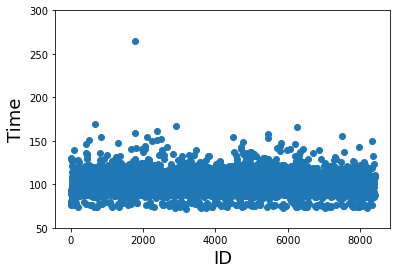

In [42]:
fig, ax = plt.subplots()
ax.scatter(data['ID'],data['y'])
ax.set_xlabel('ID', fontsize=18)
ax.set_ylabel('Time', fontsize=18)
plt.ylim(50,300)
plt.show()

In [43]:
time=data['y'].mean()
print('Average testing time: %.2f seconds' %time )

Average testing time: 100.67 seconds


In [44]:
feature2 = [ ]
for i,v in enumerate(importance):
    if v >= 0.05:
        print('Feature: %0d, Percent: %.5f%%, Time: %.2f s' % (i,v*100,v*time))
        feature2.append(i)

Feature: 0, Percent: 10.26957%, Time: 10.34 s
Feature: 306, Percent: 35.76899%, Time: 36.01 s
Feature: 307, Percent: 6.04507%, Time: 6.09 s


In [45]:
tmp=X_train.iloc[:,feature2]
for col in tmp.columns:
    print(col)

ID
X314
X315


## 6. Takeaway
- Key features were identified. Effort should be prioritized on optimizing those key features.
- Top 3 features together require more than 40% time for testing, which are ID, X314, and X315.
- Feature <b>X314</b>: took 35.8% testing time, about 36 seconds average.

## Reference
https://www.kaggle.com/c/mercedes-benz-greener-manufacturing

## Image Courtesy
https://unsplash.com/photos/jHZ70nRk7Ns